In [1]:
import pandas as pd
import numpy as np

In [2]:
dr= pd.read_csv('koreadrought.csv', encoding='cp949', low_memory = False)

In [3]:
dr = dr.drop(['피해종료일'], axis = 1)

In [4]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      1634 non-null   object
 1   시군구     1634 non-null   object
 2   읍면동     1634 non-null   object
 3   피해유형    1634 non-null   object
 4   피해인구    1634 non-null   int64 
 5   피해시작일   1634 non-null   object
 6   피해일수    1634 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.5+ KB


In [5]:
dr.drop(dr[(dr['피해일수'] == '#NUM!')].index, inplace=True)

In [6]:
dr.head()

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해일수
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,189
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,170
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,170
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,91
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,106


In [7]:
dr['시도'].unique()

array(['전라남도', '경상북도', '강원도', '경상남도', '전라북도', '경기도', '울산광역시', '충청북도',
       '충청남도', '인천광역시', '세종특별자치시', '광주광역시'], dtype=object)

In [8]:
dr.sort_values(by=['시도'])

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해일수
1633,강원도,춘천시,사북면,운반급수,95,2020-12-31,29
1499,강원도,원주시,행구동,운반급수,500,2019-10-25,0
421,강원도,삼척시,신기면,운반급수,199,2015-06-15,11
419,강원도,정선군,임계면,운반급수,81,2015-06-15,11
417,강원도,정선군,임계면,운반급수,32,2015-06-15,11
...,...,...,...,...,...,...,...
1175,충청북도,충주시,교현·안림동,운반급수,85,2018-02-06,0
1407,충청북도,제천시,송학면,운반급수,152,2019-06-21,102
1406,충청북도,충주시,교현·안림동,운반급수,85,2019-06-20,30
1474,충청북도,충주시,교현·안림동,운반급수,24,2019-08-05,1


In [9]:
import seaborn as sns

In [18]:
jeonnam = len(dr.loc[dr['시도'] == '전라남도']) + len(dr.loc[dr['시도'] == '광주광역시'])
gyeongbuk = len(dr.loc[dr['시도'] == '경상북도']) + len(dr.loc[dr['시도'] == '울산광역시'])
gangwon = len(dr.loc[dr['시도'] == '강원도'])
gyeongnam = len(dr.loc[dr['시도'] == '경상남도'])
jeonbuk = len(dr.loc[dr['시도'] == '전라북도'])
gyeonggi = len(dr.loc[dr['시도'] == '경기도']) + len(dr.loc[dr['시도'] == '인천광역시'])
chungbuk = len(dr.loc[dr['시도'] == '충청북도']) 
chungnam = len(dr.loc[dr['시도'] == '충청남도']) + len(dr.loc[dr['시도'] == '세종특별자치시'])

In [ ]:
# 데이터
kor = []
kor = {"jeonnam": jeonnam, "gyeongbuk": gyeongbuk, "gangwon": gangwon, "gyeongnam": gyeongnam, "jeonbuk": jeonbuk, "gyeonggi": gyeonggi, "chungbuk": chungbuk, "chungnam": chungnam}
kor

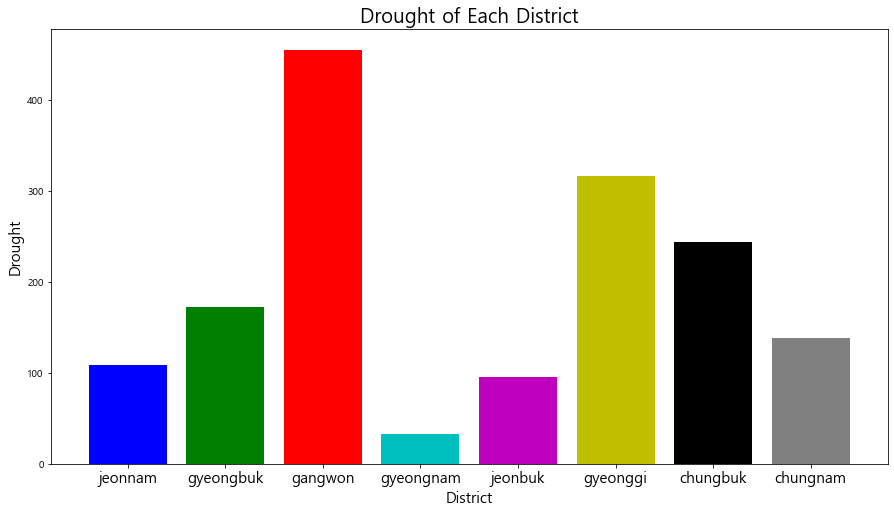

In [23]:
import matplotlib.pyplot as plt

# 데이터
data = {
    '시도': ['jeonnam', 'gyeongbuk', 'gangwon', 'gyeongnam', 'jeonbuk', 'gyeonggi', 'chungbuk', 'chungnam'],
    '가뭄발생수': [jeonnam, gyeongbuk, gangwon, gyeongnam, jeonbuk, gyeonggi, chungbuk, chungnam]   
}

# 그래프 생성
plt.figure(figsize=(15, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray', 'orange', 'purple', 'brown', 'pink', 'olive', 'teal', 'gold', 'navy', 'lime']
plt.bar(data['시도'], data['가뭄발생수'], color=colors)
plt.xlabel('District', fontsize=15)
plt.ylabel('Drought', fontsize=15)
plt.title('Drought of Each District', fontsize=20)

plt.xticks(fontsize=15)

# 그래프 출력
plt.show()

In [16]:
h = dr.sort_values(by=['피해시작일'], ascending = False)

In [ ]:
dr = dr.copy()

# '피해시작일' 열을 datetime 형식으로 변환
dr['피해시작일'] = pd.to_datetime(dr['피해시작일'], format='%Y.%m.%d')

# '피해시작일' 열을 '%Y-%m' 형식으로 변경
dr['피해시작일'] = dr['피해시작일'].dt.year

# '시도', '시군구', '피해시작일' 열을 기준으로 그룹화하여 평균 계산
data = dr.groupby(['시도', '시군구', '피해시작일']).size().reset_index(name='발생횟수')
data

In [ ]:
data.to_csv('drought.csv', index=False, encoding='utf-8')

In [ ]:
# 전라남도에 해당하는 행 추출
jeonnam_data = data[data['시도'] == '전라남도']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
plt.bar(jeonnam_data['피해시작일'], jeonnam_data['발생횟수'])

# x축, y축 라벨 설정
plt.xlabel('날짜')
plt.ylabel('발생횟수')

# 그래프 제목 설정
plt.title('전라남도 날짜별 발생횟수')

# x축 눈금 라벨 설정
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

In [ ]:
dr_jn = pd.read_csv('drought1.csv')

In [ ]:
dr_jn = data[data['시도'] == '전라남도']
dr_jn